In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from google.colab import files

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

df = pd.read_csv(url, sep =';')

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# describe the data

df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# list number of unique values per column
df.keys()

#print the number of unique items in each key


for i in df.keys():
  print(f"Column {i} has {len(np.unique(df[i]))} unique values")

Column fixed acidity has 96 unique values
Column volatile acidity has 143 unique values
Column citric acid has 80 unique values
Column residual sugar has 91 unique values
Column chlorides has 153 unique values
Column free sulfur dioxide has 60 unique values
Column total sulfur dioxide has 144 unique values
Column density has 436 unique values
Column pH has 89 unique values
Column sulphates has 96 unique values
Column alcohol has 65 unique values
Column quality has 6 unique values


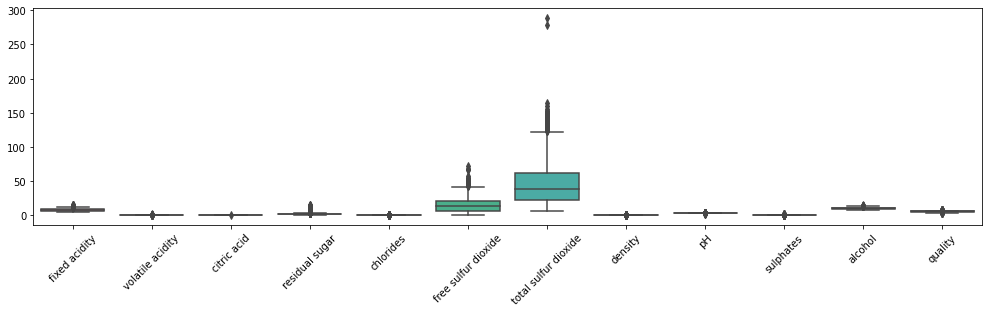

In [5]:
# plot some data
fig,ax = plt.subplots(1,figsize=(17,4))

ax = sns.boxplot(data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
plt.show()

In [6]:
# remove rows with outliers in total sulfur dioxide 

df = df[df ['total sulfur dioxide']<200]



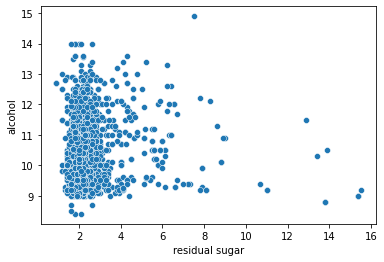

In [7]:
#visual data exploration

sns.scatterplot(x=df['residual sugar'],y=df['alcohol'])
plt.show()

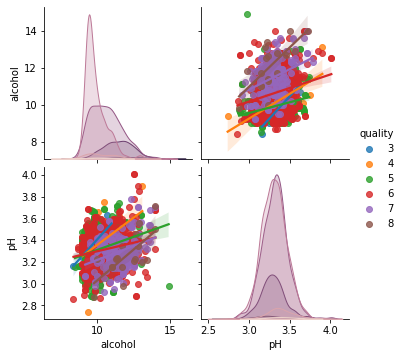

In [8]:
sns.pairplot(df[['alcohol','pH','quality']],kind='reg',hue='quality')
plt.show()

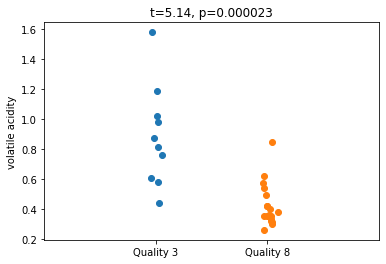

In [18]:
## t-test of volatile acidity on quality= 3 vs. 8

#grab the data 

x= df['volatile acidity'][df['quality'] == 3]
y = df['volatile acidity'][df['quality'] == 8]

# do the t-test

ttest= stats.ttest_ind(x,y)

#plot the data 

plt.plot(np.random.randn(len(x))/30, x, 'o',
         np.random.randn(len(y))/30+1, y, 'o')
plt.xlim([-1,2])
plt.xticks([0,1], labels=['Quality 3','Quality 8'])
plt.ylabel('volatile acidity')
plt.title(f't={ttest[0]:.2f}, p={ttest[1]:.6f}')

plt.show()

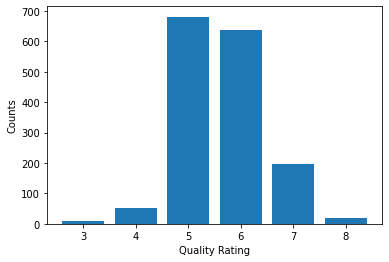

In [23]:
# show a histogram of quality scores

qualcounts = np.zeros(6)

n=0
for i in range (3,9):
 qualcounts[n] = len(df[df['quality']==i])
 n += 1

qualcounts
plt.bar(range(3,9),qualcounts)
plt.xlabel('Quality Rating')
plt.ylabel('Counts')

plt.show()

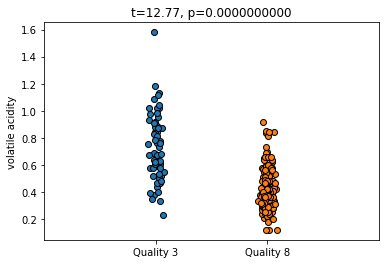

In [30]:
# repeat the t-test but using quality=3/4 vs. 7/8

#grab the data 

x = df['volatile acidity'][(df['quality'] == 3) | (df['quality'] == 4)]
y = df['volatile acidity'][(df['quality'] == 8) | (df['quality'] == 7)]

# do the t-test

ttest= stats.ttest_ind(x,y)

#plot the data 

plt.plot(np.random.randn(len(x))/30, x, 'o',
         np.random.randn(len(y))/30+1, y, 'o',
         markeredgecolor = 'k')
plt.xlim([-1,2])
plt.xticks([0,1], labels=['Quality 3','Quality 8'])
plt.ylabel('volatile acidity')
plt.title(f't={ttest[0]:.2f}, p={ttest[1]:.10f}')

plt.show()